In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

tensao = float(input("Insira a tensao que deseja mensurar: "))
v=15 #15V
r=1000 #1kOhm
c=100e-6 #100uF
#Função analisada
def func(t,desloc=tensao,v=v,r=r,c=c):
    return v*(1-math.e**(-t/(r*c)))-desloc




Insira a tensao que deseja mensurar: 8


In [ ]:
def bisseccaoraiz(func,a,b,precisao):
    '''retorna a raiz aproximada da precisão através do método da bissecção, 
    que aproxima se utilizando dos conhecimentos em cálculo, como a teoria da continuidade e do ponto médio
    '''

    #É necessário que a func seja contínua entre a,b e que haja uma raiz entre os dois pontos
    intervalo=[a,b]

    if func(a)*func(b)<0: #Testa se a raiz está no intervalo
        while abs(intervalo[1]-intervalo[0])>precisao: #Enquanto o intervalo não for menor que a precisão, recalcula o ponto médio e itera novamente
            fa = func(intervalo[0])
            fb = func(intervalo[1])

            x1 = (intervalo[1]+intervalo[0])/2
            if fa*func(x1)<0: #Testa se a raiz está entre o ponto médio e A para definir qual ponto o novo ponto médio irá substituir
                intervalo[1]=x1
            else:
                intervalo[0]=x1

            print(intervalo)
        return sum(intervalo)/2
    print('O método da bissecção é inválido quando não temos f(a)*f(b)<0')

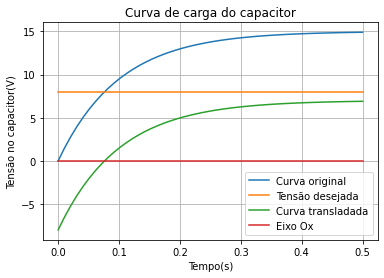



Digite o valor da extremidade inferior do intervalo: 0
Digite o valor da extremidade superior do intervalo: .5
Insira a precisão necessária: .0001
[0.0, 0.25]
[0.0, 0.125]
[0.0625, 0.125]
[0.0625, 0.09375]
[0.0625, 0.078125]
[0.0703125, 0.078125]
[0.07421875, 0.078125]
[0.076171875, 0.078125]
[0.076171875, 0.0771484375]
[0.076171875, 0.07666015625]
[0.076171875, 0.076416015625]
[0.076171875, 0.0762939453125]
[0.076171875, 0.07623291015625]
O tempo necessário para o capacitor se carregar até a tensão de 8.0V é 76.20ms


In [ ]:
#Mostra os gráficos
interval = np.linspace(0,5*r*c,50)
plt.plot(interval,[func(x,desloc=0) for x in interval])
plt.plot(interval,[tensao]*len(interval))
plt.plot(interval,[func(x,) for x in interval])
plt.plot(interval,[0] * len(interval))
plt.title("Curva de carga do capacitor")
plt.xlabel("Tempo(s)"),plt.ylabel("Tensão no capacitor(V)")
plt.legend(["Curva original","Tensão desejada","Curva transladada","Eixo Ox"]),plt.grid()
plt.show()
print('\n')

#Parâmetros para o cálculo da bissecção
a = float(input("Digite o valor da extremidade inferior do intervalo: "))
b = float(input("Digite o valor da extremidade superior do intervalo: "))
prec = float(input("Insira a precisão necessária: "))

resposta=bisseccaoraiz(func,a,b,prec)

if resposta:
  print(f"O tempo necessário para o capacitor se carregar até a tensão de {tensao}V é {resposta*1000:.2f}ms")

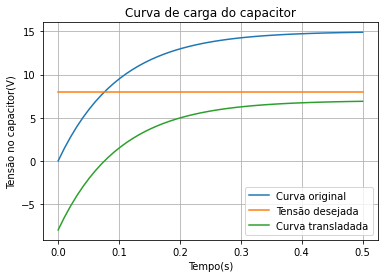


entre um valor próximo da raiz conhecida: .5
quantas iteracoes? 150
Insira a precisão necessária: .0001
O tempo necessário para o capacitor se carregar até a tensão de 8.0V é 76.21ms


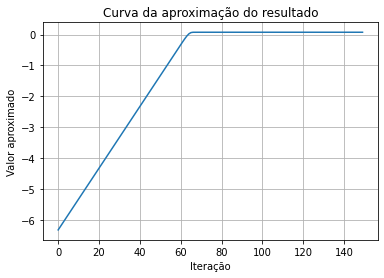

In [ ]:
#definir a derivada da função
def flinha(t,r=r,c=c,v=v): 
    return (math.e**(-t/(c*r))*v)/(c*r)

#definir o metodo de newton-raphson
def newtonRaphson():
    #Mostra o gráfico
    interval = np.linspace(0,5*r*c,50)
    plt.plot(interval,[func(x,desloc=0) for x in interval])
    plt.plot(interval,[tensao]*len(interval))
    plt.plot(interval,[func(x) for x in interval])
    plt.title("Curva de carga do capacitor")
    plt.xlabel("Tempo(s)"),plt.ylabel("Tensão no capacitor(V)")
    plt.legend(["Curva original","Tensão desejada","Curva transladada"])
    plt.grid()
    plt.show()
    print()

    #parâmetros do cálculo
    ap1 = float(input("entre um valor próximo da raiz conhecida: "))
    ite = int(input("quantas iteracoes? "))
    prec = float(input("Insira a precisão necessária: "))

    pontos=[]
    for _ in range(ite): #Itera pelo gráfico realizando a substituição do ponto observado
        ap1 = ap1 - func(ap1)/flinha(ap1)
        pontos.append(ap1)
    if func(ap1)<prec and ap1>0:
        print(f"O tempo necessário para o capacitor se carregar até a tensão de {tensao}V é {ap1*1000:.2f}ms")
    else:
        print('O programa não foi capaz de definir uma resposta com o número de interações e precisão definidos')
    plt.plot(pontos)
    plt.title("Curva da aproximação do resultado")
    plt.xlabel("Iteração"),plt.ylabel("Valor aproximado"),plt.grid()
    plt.show()
try:
    newtonRaphson()
except Exception as erro:
    print(erro,'Houve um erro. O programa não foi capaz de definir uma resposta com o número de interações e precisão definidos')


### Utilizando os métodos para funções digitadas pelo usuario

In [ ]:
from sympy import *
init_printing()
var('x,y')
f = Lambda(x,eval(input("Insira a função de x que deseja utilizar: ")))
f

Insira a função de x que deseja utilizar: x**3-10


Insira o limite inferior: -15
Insira o limite superior: 15


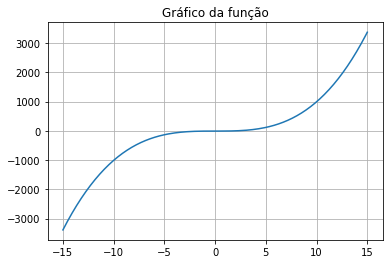

In [ ]:
#Gráfico
a=int(input("Insira o limite inferior: "))
b=int(input("Insira o limite superior: "))
intervalo = np.linspace(a,b,200)
plt.plot(intervalo,[f(x) for x in intervalo])
plt.title("Gráfico da função")
plt.grid()
plt.show()

###Encontrando as raizes com os dois métodos

In [ ]:
#Método da bissecção
print("Defina um intervalo que contenha apenas uma raiz")
a=int(input("Insira o limite inferior: "))
b=int(input("Insira o limite superior: "))
bisseccaoraiz(f,a,b,1e-4)

Defina um intervalo que contenha apenas uma raiz
Insira o limite inferior: -10
Insira o limite superior: 5
[-2.5, 5]
[1.25, 5]
[1.25, 3.125]
[1.25, 2.1875]
[1.71875, 2.1875]
[1.953125, 2.1875]
[2.0703125, 2.1875]
[2.12890625, 2.1875]
[2.12890625, 2.158203125]
[2.1435546875, 2.158203125]
[2.15087890625, 2.158203125]
[2.15087890625, 2.154541015625]
[2.1527099609375, 2.154541015625]
[2.15362548828125, 2.154541015625]
[2.154083251953125, 2.154541015625]
[2.1543121337890625, 2.154541015625]
[2.1544265747070312, 2.154541015625]
[2.1544265747070312, 2.1544837951660156]


entre um valor próximo da raiz conhecida: -5
quantas iteracoes deseja realizar? 50
Insira a precisão necessária: .0001
A raiz encontrada foi 2.154434690031884


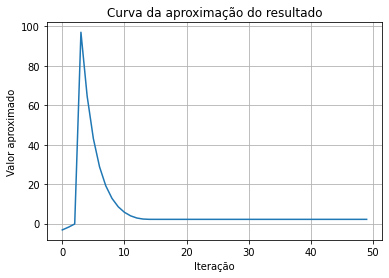

In [ ]:
#Método de Newton Raphson
def newtonRaphson(funcao):
    #parâmetros do cálculo
    ap1 = float(input("entre um valor próximo da raiz conhecida: "))
    ite = int(input("quantas iteracoes deseja realizar? "))
    prec = float(input("Insira a precisão necessária: "))

    pontos=[]
    for n in range(ite): #Itera pelo gráfico realizando a substituição do ponto observado
        ap1 = ap1 - float(funcao(ap1))/float(diff(funcao(x),x).subs(x,ap1))
        pontos.append(ap1)
        if (pontos[-1] - pontos[-2])<precisao:
            break
    if funcao(ap1)<prec and ap1>0:
        print(f"A raiz encontrada foi {ap1} com {n} iterações")
    else:
        print('O programa não foi capaz de definir uma resposta com o número de interações e precisão definidos')
    plt.plot(pontos)
    plt.title("Curva da aproximação do resultado")
    plt.xlabel("Iteração"),plt.ylabel("Valor aproximado"),plt.grid()
    plt.show()
try:
    newtonRaphson(f)
except Exception as erro:
    print(erro,'Houve um erro. O programa não foi capaz de definir uma resposta com o número de interações e precisão definidos')